## Spectral Feature Extraction

In [0]:
# !sudo apt-get install -qq python python-dev python-pip build-essential swig libpulse-dev
# !sudo pip install pocketsphinx

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !unzip drive/My\ Drive/emotion

In [0]:
import os

In [0]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [0]:
import numpy as np
import pandas as pd

In [0]:
classes = os.listdir('meld/train/')

In [5]:
classes

['neutral', 'happy', 'disgust', 'sad', 'fear']

In [0]:
# !rm -rf train_mel_spectrogram_neutral/
# !rm -rf train_mfcc_neutral/
os.mkdir('train_mel_spectrogram_'+str(classes[4]))
os.mkdir('train_mfcc_'+str(classes[4]))

In [0]:
# os.mkdir('train_mel_spectrogram_'+str(classes[0]))

In [0]:
# os.mkdir('train_mfcc_'+str(classes[0]))

In [0]:
def get_mfcc(file, feature='mfcc'):
  
  # image file
  img = file.replace('.wav', '_mfcc.jpg')
  img = img.split('/')[-1]
  
  # mfcc features
  aud, sr = librosa.load(path=file, duration=6)
  mfcc = librosa.feature.mfcc(y=aud, sr=sr, n_mfcc=40)
  fig = librosa.display.specshow(mfcc, x_axis=None, y_axis=None)
  plt.box(on=False)
  plt.savefig('train_mel_spectrogram_fear/'+img,  pad_inches=0)
  return img

  
def get_mel(file, feature='mel_spec'):
  
  # image file
  img = file.replace('.wav', '_mel.jpg')
  img = img.split('/')[-1]
  
  # get the mel spectrogram
  aud, sr = librosa.load(path=file, duration=6)
  S = librosa.feature.melspectrogram(y=aud, sr=sr, n_mels=128, fmax=8000)
  S_dB = librosa.power_to_db(S, ref=np.max)
  fig = librosa.display.specshow(S_dB, x_axis=None,y_axis=None, sr=sr, fmax=8000)
  
  plt.box(on=False)
  plt.savefig('train_mfcc_fear/'+img,  pad_inches=0)
  
  return img

def get_rms(file, feature='rms'):
  aud, sr = librosa.load(path=file, duration=6)
  S, phase = librosa.magphase(librosa.stft(aud))
  rms = librosa.feature.rms(S=S)
  rms = rms.flatten()
  if rms.shape[0] < 128:
    rms = np.pad(rms, pad_width=128-rms.shape[0],mode='mean')
  elif rms.shape[0] > 128:
    rms = rms[:128]
  return rms

In [0]:
features_train_neutral = {}


In [0]:
features_train_fear = {}

In [0]:
np.random.seed(42)

#DataFlair - Load the data and extract features for each sound file

def load_data(path, cls=classes[4]):
    
  
    files = np.array(os.listdir(path))
    # downsampling we will take only less than 700 data points
    if files.shape[0] > 700:
      files = files[:700]
      
    i = 0
      
    for file in files:
      data = {}
      
      file_path = path+'/'+file
      mfcc = get_mfcc(str(file_path))
      mel = get_mel(str(file_path))
      rms = get_rms(str(file_path))
      
      data['emotion']=cls
      data['mfcc']=mfcc
      data['mel']=mel
      data['rms']=rms
      
      features_train_fear[file] = data

      
      if i%50==0:
        print('%d of class '%i+cls+" have been processed")
      i+=1
            
    return features_train_fear

0 of class fear have been processed
50 of class fear have been processed
100 of class fear have been processed
150 of class fear have been processed
200 of class fear have been processed


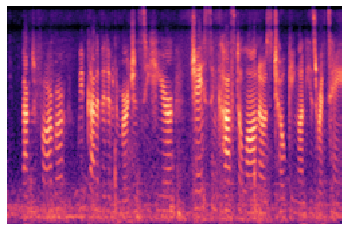

In [32]:
features = load_data('meld/train/fear/')

In [33]:
len(features_train_fear)

216

In [34]:
!zip -r train_mel_spectrogram_fear.zip train_mel_spectrogram_fear/

updating: train_mel_spectrogram_fear/ (stored 0%)
  adding: train_mel_spectrogram_fear/MEL_dia476_utt10_negative_FEA_mfcc.jpg (deflated 6%)
  adding: train_mel_spectrogram_fear/MEL_dia915_utt4_negative_FEA_mfcc.jpg (deflated 5%)
  adding: train_mel_spectrogram_fear/MEL_dia679_utt12_negative_FEA_mfcc.jpg (deflated 5%)
  adding: train_mel_spectrogram_fear/MEL_dia782_utt6_negative_FEA_mfcc.jpg (deflated 6%)
  adding: train_mel_spectrogram_fear/MEL_dia264_utt8_negative_FEA_mfcc.jpg (deflated 5%)
  adding: train_mel_spectrogram_fear/MEL_dia293_utt2_negative_FEA_mfcc.jpg (deflated 6%)
  adding: train_mel_spectrogram_fear/MEL_dia743_utt3_negative_FEA_mfcc.jpg (deflated 4%)
  adding: train_mel_spectrogram_fear/MEL_dia605_utt6_negative_FEA_mfcc.jpg (deflated 6%)
  adding: train_mel_spectrogram_fear/MEL_dia572_utt17_negative_FEA_mfcc.jpg (deflated 30%)
  adding: train_mel_spectrogram_fear/MEL_dia182_utt4_negative_FEA_mfcc.jpg (deflated 8%)
  adding: train_mel_spectrogram_fear/MEL_dia695_utt3_neg

In [35]:
!zip -r train_mfcc_fear.zip train_mfcc_fear/

updating: train_mfcc_fear/ (stored 0%)
  adding: train_mfcc_fear/MEL_dia1018_utt7_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia148_utt15_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia994_utt0_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia211_utt12_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia223_utt3_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia945_utt7_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia854_utt0_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia505_utt6_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia845_utt7_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia908_utt0_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia827_utt5_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia976_utt12_negative_FEA_mel.jpg (deflated 2%)
  adding: train_mfcc_fear/MEL_dia

In [36]:
print(len(os.listdir('train_mel_spectrogram_fear/')), len(os.listdir('train_mfcc_fear/')))

216 216


In [0]:
import pickle

In [0]:
with open('spectral_features_train_fear.pkl', 'wb') as fp:
  pickle.dump(features_train_fear, fp)